https://towardsdatascience.com/walking-through-support-vector-regression-and-lstms-with-stock-price-prediction-45e11b620650

https://github.com/kartik-joshi/Stock-predection

### Import libs

In [35]:
import warnings
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

It seems that when we train the model on only more recent data, we get a much better prediction. See the marked line below to comment/uncomment to see the changes in our results.

In [192]:
df = pd.read_csv('./data_clean/AAPL.csv')
df = df.sort_values('date')
df = df.drop(['open','high','low','close','volume'], axis=1)

df = df.query('date >= "2019-01-01"') # <---------- this line
df = df.reset_index(drop=True)

In [193]:
df['momentum'] = df['adj close']
df['volatility'] = df['adj close']
df['adj_close_avg'] = df['adj close']

In [194]:
for i, row in df.iterrows():
    if i > 1:
        row['momentum'] = 1 if df['adj close'][i - 1] > df['adj close'][i - 2] else -1
        row['volatility'] = df['adj close'][i - 1] / df['adj close'][i - 2]
    else:
        row['momentum'] = 0
        row['volatility'] = 0
    
    if i > 4:
        row['adj_close_avg'] = sum(df['adj close'][i] for i in range(i - 5, i)) / 5
    else:
        row['adj_close_avg'] = 0

### Check data

In [195]:
df.head()

,date,adj close,momentum,volatility,adj_close_avg
0,2019-01-02,155.214005,155.214005,155.214005,155.214005
1,2019-01-03,139.753540,139.753540,139.753540,139.753540
2,2019-01-04,145.719513,145.719513,145.719513,145.719513
3,2019-01-07,145.395203,145.395203,145.395203,145.395203
4,2019-01-08,148.166870,148.166870,148.166870,148.166870


In [196]:
df.describe()

,adj close,momentum,volatility,adj_close_avg
count,315.000000,315.000000,315.000000,315.000000
mean,223.825974,223.825974,223.825974,223.825974
std,48.564793,48.564793,48.564793,48.564793
min,139.753540,139.753540,139.753540,139.753540
25%,188.974136,188.974136,188.974136,188.974136
50%,206.935638,206.935638,206.935638,206.935638
75%,261.484421,261.484421,261.484421,261.484421
max,327.200012,327.200012,327.200012,327.200012


In [197]:
print('Dimension of data:', df.shape)

Dimension of data: (315, 5)


### Plot Data

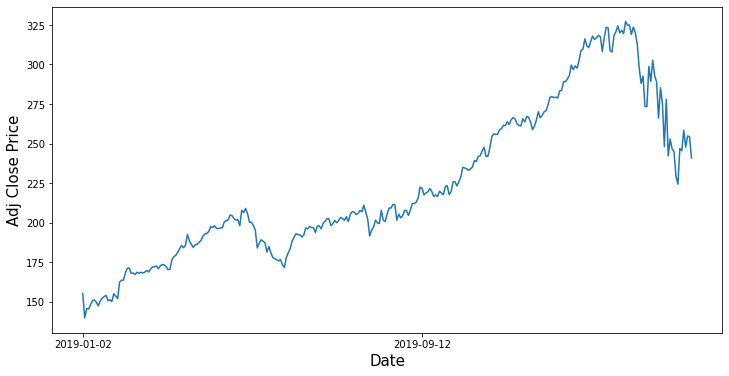

In [198]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['adj close'])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Adj Close Price', fontsize=15)
plt.xticks(np.arange(0, len(df['date']), 175))
plt.show()

### Create feature set and target vector

In [199]:
X = df.drop(labels=['adj close'], axis=1)
y = df['adj close']

print('Dimension of feature matrix:', X.shape)
print('Dimension of target vector:', y.shape)

Dimension of feature matrix: (315, 4)
Dimension of target vector: (315,)


### Create test and train datasets

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

dates = X_test['date']
X_train = X_train.drop(labels=['date'], axis=1)
X_test = X_test.drop(labels=['date'], axis=1)

### Train Model

#### SVM regression

In [206]:
from sklearn.svm import SVR

# SVM hyperparameter tuning - takes a long time to run
# param_grid = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}
# svr = SVR()
# grids = GridSearchCV(svr, param_grid, scoring='precision', cv=5, verbose=10)
# grids.fit(X_train, y_train)
# params_optimal = grids.best_params_
# svr = SVR(params_optimal)
# y_pred = svr.fit(X_train, y_train).predict(X_test)


# Uncomment below
# svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
# y_pred = svr.fit(X_train, y_train).predict(X_test)

# svm_confidence = svr.score(X_test, y_test)
# print('SVM Confidence:', svm_confidence)

#### Random forests regression

In [207]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
y_pred = reg.fit(X_train, y_train).predict(X_test)

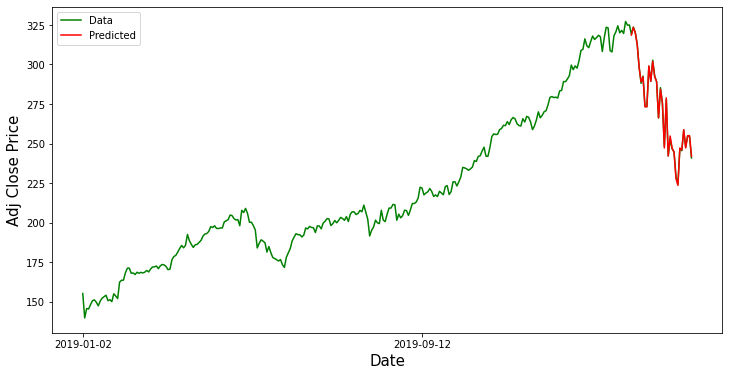

In [208]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['adj close'], color='green', label='Data')
plt.plot(dates, y_pred, color='red', label='Predicted')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Adj Close Price', fontsize=15)
plt.xticks(np.arange(0, len(df['date']), 175))
plt.legend()
plt.show()

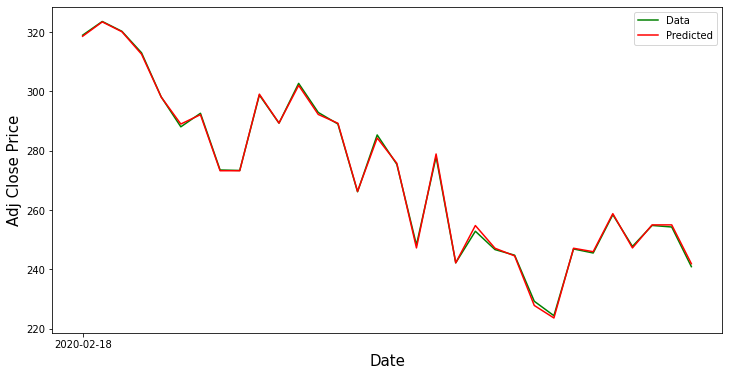

In [209]:
plt.figure(figsize=(12,6))
plt.plot(dates, y_test, color='green', label='Data')
plt.plot(dates, y_pred, color='red', label='Predicted')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Adj Close Price', fontsize=15)
plt.xticks(np.arange(0, len(dates), 50))
plt.legend()
plt.show()

### Evaluate Model

In [210]:
# matrix = confusion_matrix(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print('Confusion Matrix:\n', matrix)
# print('Precision: %f' % precision)
# print('Recall: %f' % recall)
# print('F1 Score: %f' % f1)